In [17]:
import sys
print(sys.executable)

E:\anaconda\envs\py39\python.exe


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import keras.backend as K
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
import os
#path = r'E:\Large\CATS_DOGS'
path = r'E:\Large\CATS_DOGS_LIGHT'
os.chdir(path)

### Data Augmentation Demo

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [21]:
datagen = ImageDataGenerator(
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

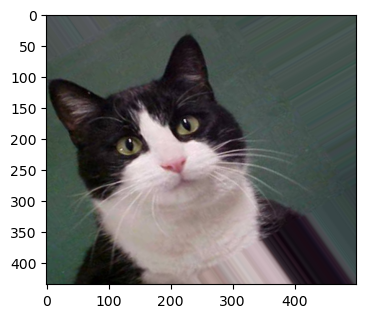

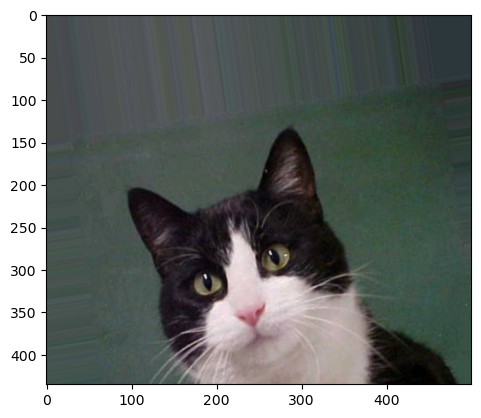

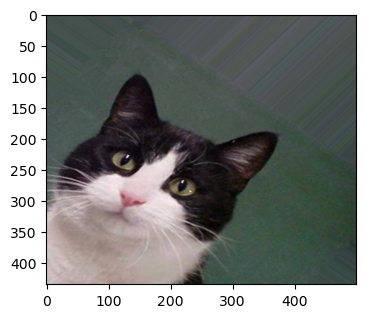

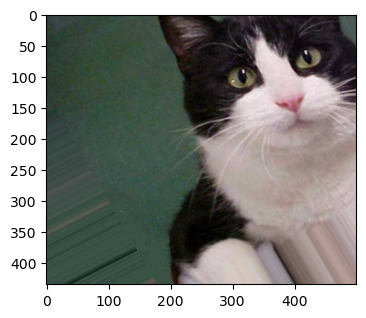

In [22]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image
img = image.load_img('./single_prediction/cat_or_dog_3.jpg')
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
plt.imshow(img)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i, figsize=(4,4))
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [23]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

In [25]:
## steps_per_epoch * batch_size = number_of_rows_in_train_data
## validation_steps = TotalvalidationSamples / ValidationBatchSize

In [26]:
# Part 2 - Fitting the CNN to the images
K.clear_session()

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory('./train',
                        target_size = (64, 64),batch_size = 32, class_mode = 'binary')

test_gen = test_datagen.flow_from_directory('./test',
                        target_size = (64, 64), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
train_gen

In [33]:
##steps_per_epoch = 8000, validation_steps = 200
hist = classifier.fit(train_gen, epochs =10, validation_data = test_gen)

Epoch 1/10
32/32 [==============================] - 16s 432ms/step - loss: 0.7273 - accuracy: 0.5270 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/10
32/32 [==============================] - 8s 255ms/step - loss: 0.6846 - accuracy: 0.5450 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/10
32/32 [==============================] - 8s 254ms/step - loss: 0.6770 - accuracy: 0.5670 - val_loss: 0.6744 - val_accuracy: 0.5950
Epoch 4/10
32/32 [==============================] - 8s 246ms/step - loss: 0.6690 - accuracy: 0.5920 - val_loss: 0.6624 - val_accuracy: 0.6400
Epoch 5/10
32/32 [==============================] - 8s 252ms/step - loss: 0.6537 - accuracy: 0.6200 - val_loss: 0.7538 - val_accuracy: 0.5125
Epoch 6/10
32/32 [==============================] - 8s 260ms/step - loss: 0.6358 - accuracy: 0.6600 - val_loss: 0.6615 - val_accuracy: 0.6075
Epoch 7/10
32/32 [==============================] - 8s 259ms/step - loss: 0.6035 - accuracy: 0.6730 - val_loss: 0.6331 - val_accuracy: 0.6500
Epoch

In [8]:
yt_prob = classifier.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

13/13 [==============================] - 2s 132ms/step


In [9]:
confusion_matrix(y_test, yt_pred)

array([[ 85, 115],
       [ 34, 166]], dtype=int64)

In [10]:
accuracy_score(y_test, yt_pred)

0.6275

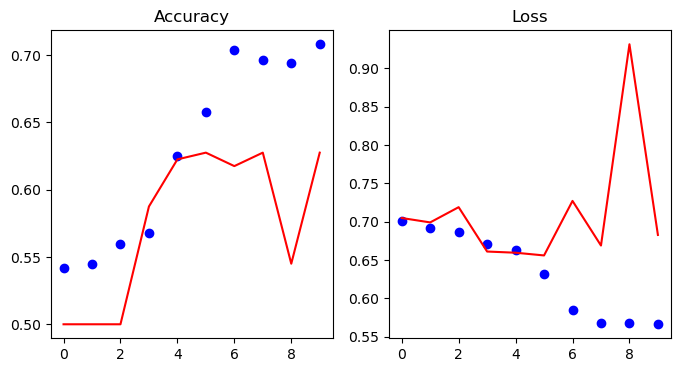

In [11]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

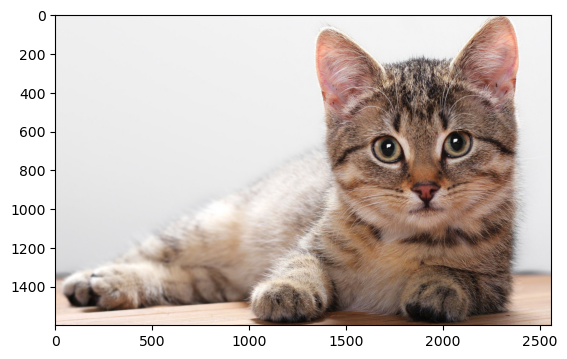

In [12]:
from tensorflow.keras.utils import load_img
test_image = load_img('./single_prediction/cat_or_dog_2.jpg')
plt.imshow(test_image)
plt.show()

In [15]:
train_gen.class_indices.keys()

dict_keys(['CAT', 'DOG'])

In [18]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print('Prediction: ', prediction)

1/1 [==============================] - 0s 93ms/step
Prediction:  dog


In [19]:
result

array([[1.]], dtype=float32)

### VGG16 

In [40]:
import glob as glob
import cv2

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [41]:
K.clear_session()
img_size=224
input_shape = (img_size, img_size, 3)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = train_datagen.flow_from_directory('./train',
                        target_size = (img_size, img_size),batch_size = 32, class_mode = 'binary')
test_gen = test_datagen.flow_from_directory('./test',
                        target_size = (img_size, img_size), batch_size = 32, class_mode = 'binary', shuffle=False)

Found 1000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [42]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace

vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape=input_shape)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation = 'sigmoid')(x)
model = Model(vgg16_model.input, predictions)

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [45]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
# fit the model, log the results and the training time
hist = model.fit(train_gen, epochs = 10, validation_data = test_gen)

Epoch 1/10
32/32 [==============================] - 193s 6s/step - loss: 0.5967 - accuracy: 0.6470 - val_loss: 0.4570 - val_accuracy: 0.7975
Epoch 2/10
32/32 [==============================] - 193s 6s/step - loss: 0.4074 - accuracy: 0.8310 - val_loss: 0.4019 - val_accuracy: 0.8050
Epoch 3/10
32/32 [==============================] - 189s 6s/step - loss: 0.3367 - accuracy: 0.8530 - val_loss: 0.3058 - val_accuracy: 0.8725
Epoch 4/10
32/32 [==============================] - 180s 6s/step - loss: 0.3058 - accuracy: 0.8710 - val_loss: 0.2552 - val_accuracy: 0.8950
Epoch 5/10
32/32 [==============================] - 192s 6s/step - loss: 0.2628 - accuracy: 0.8990 - val_loss: 0.2746 - val_accuracy: 0.8850
Epoch 6/10
32/32 [==============================] - 185s 6s/step - loss: 0.2689 - accuracy: 0.8850 - val_loss: 0.2581 - val_accuracy: 0.8950
Epoch 7/10
32/32 [==============================] - 183s 6s/step - loss: 0.2595 - accuracy: 0.8950 - val_loss: 0.2234 - val_accuracy: 0.9175
Epoch 8/10
32

In [47]:
# evaluate the performance the new model and report the results
score = model.evaluate(test_gen)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

13/13 [==============================] - 50s 4s/step - loss: 0.2033 - accuracy: 0.9250
Test Score: 0.20331935584545135
Test Accuracy: 0.925000011920929


### Testing for Accuracy

In [48]:
yt_prob = model.predict(test_gen)
yt_pred = np.where(yt_prob>=0.5,1,0)
y_test = test_gen.classes

13/13 [==============================] - 58s 4s/step


In [49]:
confusion_matrix(y_test, yt_pred)

array([[186,  14],
       [ 16, 184]], dtype=int64)

In [50]:
accuracy_score(y_test, yt_pred)

0.925

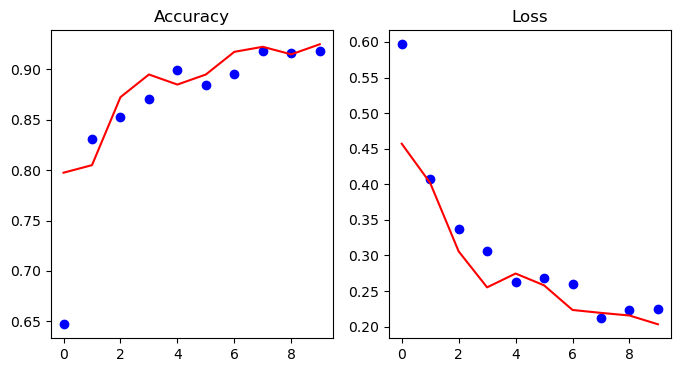

In [51]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

In [53]:
test_image = load_img('./single_prediction/cat_or_dog_2.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
    
print('Prediction: ', prediction)

1/1 [==============================] - 1s 564ms/step
Prediction:  cat


In [54]:
result

array([[0.]], dtype=float32)

### RESNET

In [29]:
from keras import applications

In [30]:
from keras.applications.resnet import ResNet50

In [31]:
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))

In [55]:
img_height,img_width = 224, 224 
base_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

In [36]:
K.clear_session()

x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dropout(0.7)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation= 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [37]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
hist = model.fit(train_gen, epochs = 5, validation_data = test_gen)

Epoch 1/5
32/32 [==============================] - 44s 1s/step - loss: 0.4355 - accuracy: 0.7920 - val_loss: 2.3060 - val_accuracy: 0.5000
Epoch 2/5
32/32 [==============================] - 36s 1s/step - loss: 0.2557 - accuracy: 0.9130 - val_loss: 1.4898 - val_accuracy: 0.4950
Epoch 3/5
32/32 [==============================] - 36s 1s/step - loss: 0.1785 - accuracy: 0.9300 - val_loss: 5.7211 - val_accuracy: 0.5000
Epoch 4/5
32/32 [==============================] - 36s 1s/step - loss: 0.1299 - accuracy: 0.9490 - val_loss: 2.0474 - val_accuracy: 0.4925
Epoch 5/5
32/32 [==============================] - 36s 1s/step - loss: 0.0987 - accuracy: 0.9670 - val_loss: 2.9640 - val_accuracy: 0.5000
